In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df = pd.read_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [148]:
df.head()

,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
1,2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2,2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
3,2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
4,2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930


In [ ]:
# Importing data previous cleaned and indexed w/ datetime, had to delete default index on import
df = df.drop(columns=["Unnamed: 0"])

In [150]:
# Datetime parsed as string, reconvert to datetime and set as index
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [151]:
df = df.set_index("Datetime")

In [152]:
df.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
Datetime,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930


In [153]:
df = df.fillna( {"Zip Code":0})

In [154]:
df[df["Zip Code"].isna()]

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
Datetime,,,,,,,,,,,,,,,,,


In [ ]:
# Turn zip code into number
df["Zip Code"] = df["Zip Code"].apply(np.int64)

In [156]:
df.to_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [157]:
# import population data
aust_pop_df = pd.read_csv("../Resources/austin_population.csv")

In [158]:
aust_pop_df = aust_pop_df.rename(columns={"Metro population":"Metro Population"})

In [159]:
aust_pop_df.to_csv("../Resources/austin_population.csv")

In [ ]:
# String manipulation to prepare for number conversion
aust_pop_df["Metro Population"] = aust_pop_df["Metro Population"].str.replace(",","")

In [164]:
aust_pop_df["Unemployment Rate"] = aust_pop_df["Unemployment Rate"].str.replace("%","")

In [165]:
aust_pop_df["Unemployment Rate"] = aust_pop_df["Unemployment Rate"].astype('float64')

In [166]:
aust_pop_df

,Unnamed: 0,Year,Population,Growth,Annual growth rate,Metro Population,Metro Growth,Metro Growth Percent,Labor Force,Employment,Unemployment,Unemployment Rate
0,0,2010,806423,"149,861",2.08%,1727528,NaN,NaN,"930,550","865,461","65,089",7.0
1,1,2011,828694,"22,271",2.76%,1780605,"53,077",2.98%,"960,844","897,490","63,354",6.6
2,2,2012,854841,"26,147",3.16%,1834926,"54,321",2.96%,"987,653","931,584","56,069",5.7
3,3,2013,875463,"20,622",2.41%,1883901,"48,975",2.60%,"1,019,483","966,601","52,882",5.2
4,4,2014,901734,"26,271",3.00%,1943409,"59,508",3.06%,"1,048,963","1,004,806","44,157",4.2
5,5,2015,921545,"19,811",2.20%,2002591,"59,182",2.96%,"1,073,300","1,037,150","36,150",3.4
6,6,2016,939768,"18,223",1.98%,2062211,"59,620",2.89%,"1,118,228","1,081,654","36,574",3.3
7,7,2017,951750,"11,982",1.27%,2115230,"53,019",2.51%,"1,158,919","1,122,474","36,445",3.1
8,8,2018,964254,"12,504",1.31%,2168316,"53,086",2.45%,"1,200,405","1,165,291","35,114",2.9


In [107]:
# Convert strings to numeric values
aust_pop_df["Metro Population"] = pd.to_numeric( aust_pop_df["Metro Population"] )

In [38]:
years = list( df.index.year.unique() )

In [40]:
years.reverse()

In [41]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [98]:
# list comprehensio to calculate crime per capita by year
crime_per_capita_by_year = [ (len( df[df.index.year==year])/int(aust_pop_df[aust_pop_df["Year"]==year]["Population"])) for year in years]

In [101]:
pop_by_year = [ int(aust_pop_df[aust_pop_df["Year"]==year]["Population"]) for year in years ]

In [102]:
pop_by_year

[806423, 828694, 854841, 875463, 901734, 921545, 939768, 951750, 964254]

In [99]:
crime_per_capita_by_year

[0.08966014114180772,
 0.07946600313264003,
 0.07550175997641667,
 0.07127085896262891,
 0.06445914205297792,
 0.06084347481674796,
 0.04787990227375267,
 0.044109272392960336,
 0.04908042901559133]

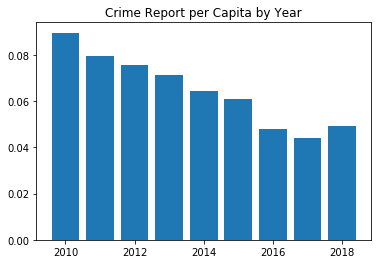

In [114]:
# graph crime per capita by year
plt.bar(years,crime_per_capita_by_year)
plt.title("Crime Report per Capita by Year")
plt.savefig("crimePerCapita.png")

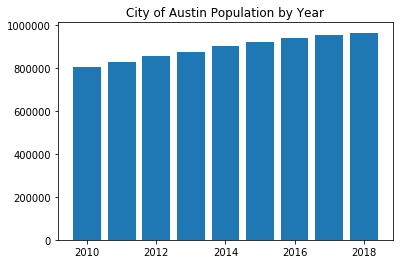

In [115]:
# graph Austin population by year
plt.bar(years,pop_by_year)
plt.title("City of Austin Population by Year")
plt.savefig("atxPopPerYear.png")

In [109]:
metro_pop_by_year = [ int(aust_pop_df[aust_pop_df["Year"]==year]["Metro Population"]) for year in years ]

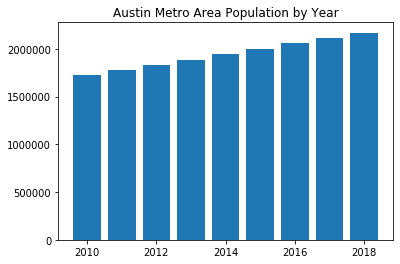

In [116]:
# Graph metro area pop by year
plt.bar(years,metro_pop_by_year)
plt.title("Austin Metro Area Population by Year")
plt.savefig("atxMetroPopPerYear.png")

In [111]:
crime_per_capita_by_year_metro = [ (len( df[df.index.year==year])/int(aust_pop_df[aust_pop_df["Year"]==year]["Metro Population"])) for year in years]



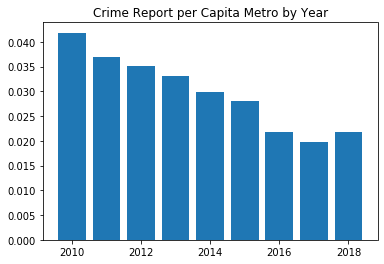

In [117]:
# Metro area crime per capita by year
plt.bar(years,crime_per_capita_by_year_metro)
plt.title("Crime Report per Capita Metro by Year")
plt.savefig("crimePerCapMetro.png")

In [118]:
zipgroup = df.groupby("Zip Code")

In [128]:
zipgroup["Highest Offense Description"].count()

Zip Code
0          715
78610       23
78612        1
78613     1726
78617     3398
78626        1
78640        3
78641        7
78645        1
78652      188
78653      393
78660     1408
78664       37
78669        1
78681       31
78701    59865
78702    30756
78703     9969
78704    39279
78705    13889
78712      121
78717     2574
78719     5362
78721     8182
78722     3428
78723    22050
78724     7186
78725      694
78726     2272
78727     6740
78728      265
78729     8076
78730      585
78731     4959
78732       67
78733       69
78734       27
78735     2813
78736      857
78737       48
78738       16
78739     1257
78741    44548
78742      537
78744    23437
78745    29092
78746     5405
78747     2778
78748    21119
78749     7942
78750     4963
78751    11805
78752    14213
78753    42006
78754     4480
78756     2998
78757    10071
78758    34576
78759    14283
Name: Highest Offense Description, dtype: int64

In [140]:
crimes_per_zip_sorted = list(zipgroup["Highest Offense Description"].count() )

In [139]:
zips_sorted = list( df["Zip Code"].unique())

In [141]:
crimes_per_zip_sorted

[715,
 23,
 1,
 1726,
 3398,
 1,
 3,
 7,
 1,
 188,
 393,
 1408,
 37,
 1,
 31,
 59865,
 30756,
 9969,
 39279,
 13889,
 121,
 2574,
 5362,
 8182,
 3428,
 22050,
 7186,
 694,
 2272,
 6740,
 265,
 8076,
 585,
 4959,
 67,
 69,
 27,
 2813,
 857,
 48,
 16,
 1257,
 44548,
 537,
 23437,
 29092,
 5405,
 2778,
 21119,
 7942,
 4963,
 11805,
 14213,
 42006,
 4480,
 2998,
 10071,
 34576,
 14283]

In [142]:
zips_sorted

[0,
 78610,
 78612,
 78613,
 78617,
 78626,
 78640,
 78641,
 78645,
 78652,
 78653,
 78660,
 78664,
 78669,
 78681,
 78701,
 78702,
 78703,
 78704,
 78705,
 78712,
 78717,
 78719,
 78721,
 78722,
 78723,
 78724,
 78725,
 78726,
 78727,
 78728,
 78729,
 78730,
 78731,
 78732,
 78733,
 78734,
 78735,
 78736,
 78737,
 78738,
 78739,
 78741,
 78742,
 78744,
 78745,
 78746,
 78747,
 78748,
 78749,
 78750,
 78751,
 78752,
 78753,
 78754,
 78756,
 78757,
 78758,
 78759]

In [188]:
list(aust_pop_df["Unemployment Rate"])

[7.0, 6.6, 5.7, 5.2, 4.2, 3.4, 3.3, 3.1, 2.9]

In [189]:
crime_per_capita_by_year_metro

[0.041854024941998046,
 0.03698349718213753,
 0.03517417051150837,
 0.03312010556818007,
 0.02990878399760421,
 0.027998727648331587,
 0.02181929977097397,
 0.019847014272679566,
 0.021826154490397157]

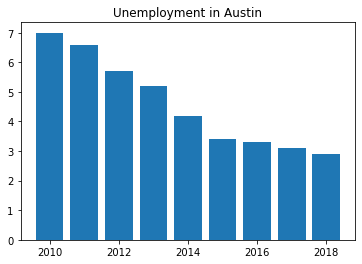

In [199]:
# graph unemployment rate over time
plt.bar(aust_pop_df["Year"],aust_pop_df["Unemployment Rate"])
plt.title("Unemployment in Austin")
plt.savefig("unemployment.png")

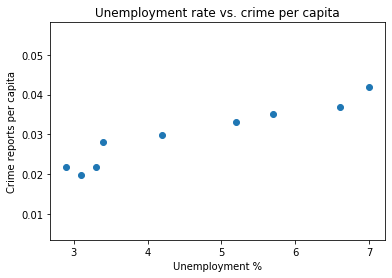

In [191]:
# scatter plot of crime rate vs unemployment
plt.scatter(list(aust_pop_df["Unemployment Rate"]),crime_per_capita_by_year_metro )
plt.title("Unemployment rate vs. crime per capita")
plt.xlabel("Unemployment %")
plt.ylabel("Crime reports per capita")
plt.savefig("crimeVsUnemployment.png")


In [175]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [194]:
# function for regression
def regression(x, y, title, xlabel, ylabel,filename):
    x = np.asarray(x)
    y = np.asarray(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,40),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filename)
    print(f"The r-squared is: {rvalue}")


In [195]:
# was getting a strange error, could not figure out why linregress not working for above scatter
regression(aust_pop_df["Unemployment Rate"],crime_per_capita_by_year_metro, 
           "Crime per capita vs. unemployment rate",
          "Unemployment %", "Crime reports per capita", "crimeVsUnemploymentRate.png")

The r-squared is: 0.9602002429022161


ValueError: Image size of 547x159453 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [179]:
list(aust_pop_df["Unemployment Rate"])

[7.0, 6.6, 5.7, 5.2, 4.2, 3.4, 3.3, 3.1, 2.9]

In [180]:
crime_per_capita_by_year_metro

[0.021826154490397157,
 0.019847014272679566,
 0.02181929977097397,
 0.027998727648331587,
 0.02990878399760421,
 0.03312010556818007,
 0.03517417051150837,
 0.03698349718213753,
 0.041854024941998046]